# 보스턴 주택 가격 데이터셋( Boston Housing Dataset)

In [28]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 58kB/s 
     |████████████████████████████████| 450kB 45.1MB/s 
     |████████████████████████████████| 3.8MB 53.2MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [0]:
# 데이터 불러오기
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
print(train_data.shape, test_data.shape)

(404, 13) (102, 13)


여기서 볼 수 있듯이 404개의 훈련 샘플과 102개의 테스트 샘플이 있고 모두 13개의 수치 특성을 가지고 있습니다. 13개의 특성은 다음과 같습니다:

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

타깃은 주택의 중간 가격으로 천달러 단위입니다:

In [4]:
print(len(train_data), len(test_data))
print(train_data[0])
print(train_targets[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [5]:
import pandas as pd
train_data_df = pd.DataFrame(train_data)
train_data_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [6]:
# 데이터 전처리 (정규화)
# : 각 데이터ㅓ에서 평균값을 뺀 다음 표준편차로 나눈 것. 이것은 데이터 분포를 정규분포로 옮기는 역할을 한다.
# 평균과 표준편차를 구할 때ㅐ 훈련 데이터의 평균과 표준편차를 구한 후 이것을 테스트 데이터로 정규화한다.

# data
x_mean = train_data.mean()
x_std = train_data.std()
train_data -= x_mean
train_data /= x_std
test_data -= x_mean
test_data /= x_std

# targets
y_mean = train_targets.mean()
y_std = train_targets.std()
train_targets -= y_mean
train_targets /= y_std
test_targets -= y_mean
test_targets /= y_std

print(train_data[0])
print(train_targets[0])
print('-'*30)
print(test_data[0])
print(test_targets[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157
------------------------------
[-0.35810982 -0.48335641 -0.35800316 -0.48335641 -0.47865393 -0.43879714
  0.20920299 -0.47065003 -0.31714216  4.12908918 -0.34345941 -0.29463398
 -0.28216791]
-1.6518090001432328


In [7]:
import tensorflow as tf

# Boston Housing Dataset Regression model 생성
model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
      tf.keras.layers.Dense(units=39, activation='relu'),
      tf.keras.layers.Dense(units=26, activation='relu'),
      tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', lr=0.07, loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


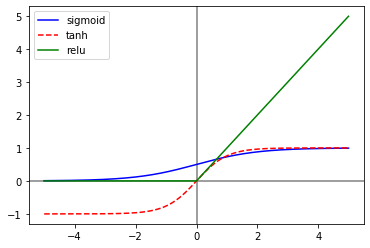

In [8]:
# 출력 코드 및 시각화
import math
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/ (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x  = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color = 'gray')
plt.axvline(0, color = 'gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g', label='relu')
plt.legend()
plt.show()

In [9]:
# regression 모델 학습
history = model.fit(train_data, train_targets, epochs=25, batch_size=32, validation_split=0.25)

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 1s 2ms/sample - loss: 0.9176 - val_loss: 1.2016
Epoch 2/25
303/303 [==============================] - 0s 165us/sample - loss: 0.7453 - val_loss: 1.0531
Epoch 3/25
303/303 [==============================] - 0s 144us/sample - loss: 0.6938 - val_loss: 1.0517
Epoch 4/25
303/303 [==============================] - 0s 132us/sample - loss: 0.6754 - val_loss: 1.0117
Epoch 5/25
303/303 [==============================] - 0s 153us/sample - loss: 0.6707 - val_loss: 1.0702
Epoch 6/25
303/303 [==============================] - 0s 155us/sample - loss: 0.6495 - val_loss: 1.0059
Epoch 7/25
303/303 [==============================] - 0s 146us/sample - loss: 0.6464 - val_loss: 1.0427
Epoch 8/25
303/303 [==============================] - 0s 138us/sample - loss: 0.6382 - val_loss: 1.0198
Epoch 9/25
303/303 [==============================] - 0s 147us/sample - loss: 0.6328 - val_loss: 1.0284
Epoch 10/25
303/303 

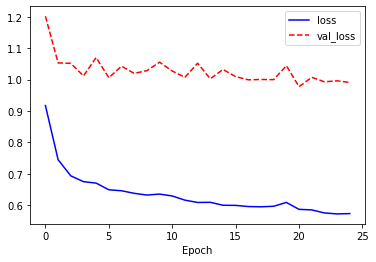

In [12]:
# regression 모델 학습 결과 시각화
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [16]:
# regression 모델 평가
model.evaluate(test_data, test_targets)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.6529330038556865

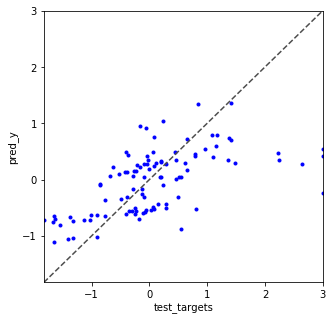

In [19]:
# 실제 주택 가격과 예측 주택 가격 시각화

pred_y = model.predict(test_data)

plt.figure(figsize=(5,5))
plt.plot(test_targets, pred_y, 'b.')
plt.axis([min(test_targets), max(test_targets), min(test_targets), max(test_targets)])

# y=x 에 해당하는 대각선
plt.plot([min(test_targets), max(test_targets)], [min(test_targets), max(test_targets)], ls='--', c=".3")
plt.xlabel('test_targets')
plt.ylabel('pred_y')

plt.show()

In [28]:
# 모델 재정의 및 학습
model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dense(units=39, activation='relu'),
        tf.keras.layers.Dense(units=26, activation='relu'),
        tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', lr=0.07, loss='mse')

history = model.fit(train_data, train_targets, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 2ms/sample - loss: 0.8420 - val_loss: 1.1722
Epoch 2/25
303/303 [==============================] - 0s 138us/sample - loss: 0.7435 - val_loss: 1.0944
Epoch 3/25
303/303 [==============================] - 0s 130us/sample - loss: 0.6934 - val_loss: 1.0770
Epoch 4/25
303/303 [==============================] - 0s 138us/sample - loss: 0.6757 - val_loss: 1.0496
Epoch 5/25
303/303 [==============================] - 0s 131us/sample - loss: 0.6691 - val_loss: 1.0515
Epoch 6/25
303/303 [==============================] - 0s 145us/sample - loss: 0.6570 - val_loss: 1.0266
Epoch 7/25
303/303 [==============================] - 0s 138us/sample - loss: 0.6453 - val_loss: 1.0382
Epoch 8/25
303/303 [==============================] - 0s 132us/sample - loss: 0.6317 - val_loss: 1.0539
Epoch 9/25
303/303 [==============================] - 0s 137us/sample - loss: 0.6221 - val_loss: 1.0189
Epoch 10/25
303/303 

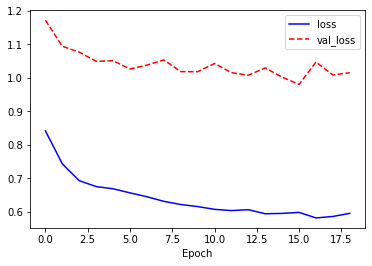

In [29]:
# regression 모델 학습 결과 시각화
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [30]:
# regression 모델 평가
model.evaluate(test_data, test_targets)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.6452729328005922

In [33]:
test_targets.shape

(102,)

In [38]:
test_targets[0:1].shape

(1,)

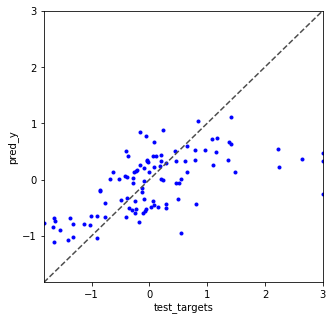

In [41]:
# 실제 주택 가격과 예측 주택 가격 시각화

pred_y = model.predict(test_data)

plt.figure(figsize=(5,5))
plt.plot(test_targets, pred_y, 'b.')
plt.axis([min(test_targets), max(test_targets), min(test_targets), max(test_targets)])

# y=x 에 해당하는 대각선
plt.plot([min(test_targets), max(test_targets)], [min(test_targets), max(test_targets)], ls='--', c=".3")
plt.xlabel('test_targets')
plt.ylabel('pred_y')

plt.show()